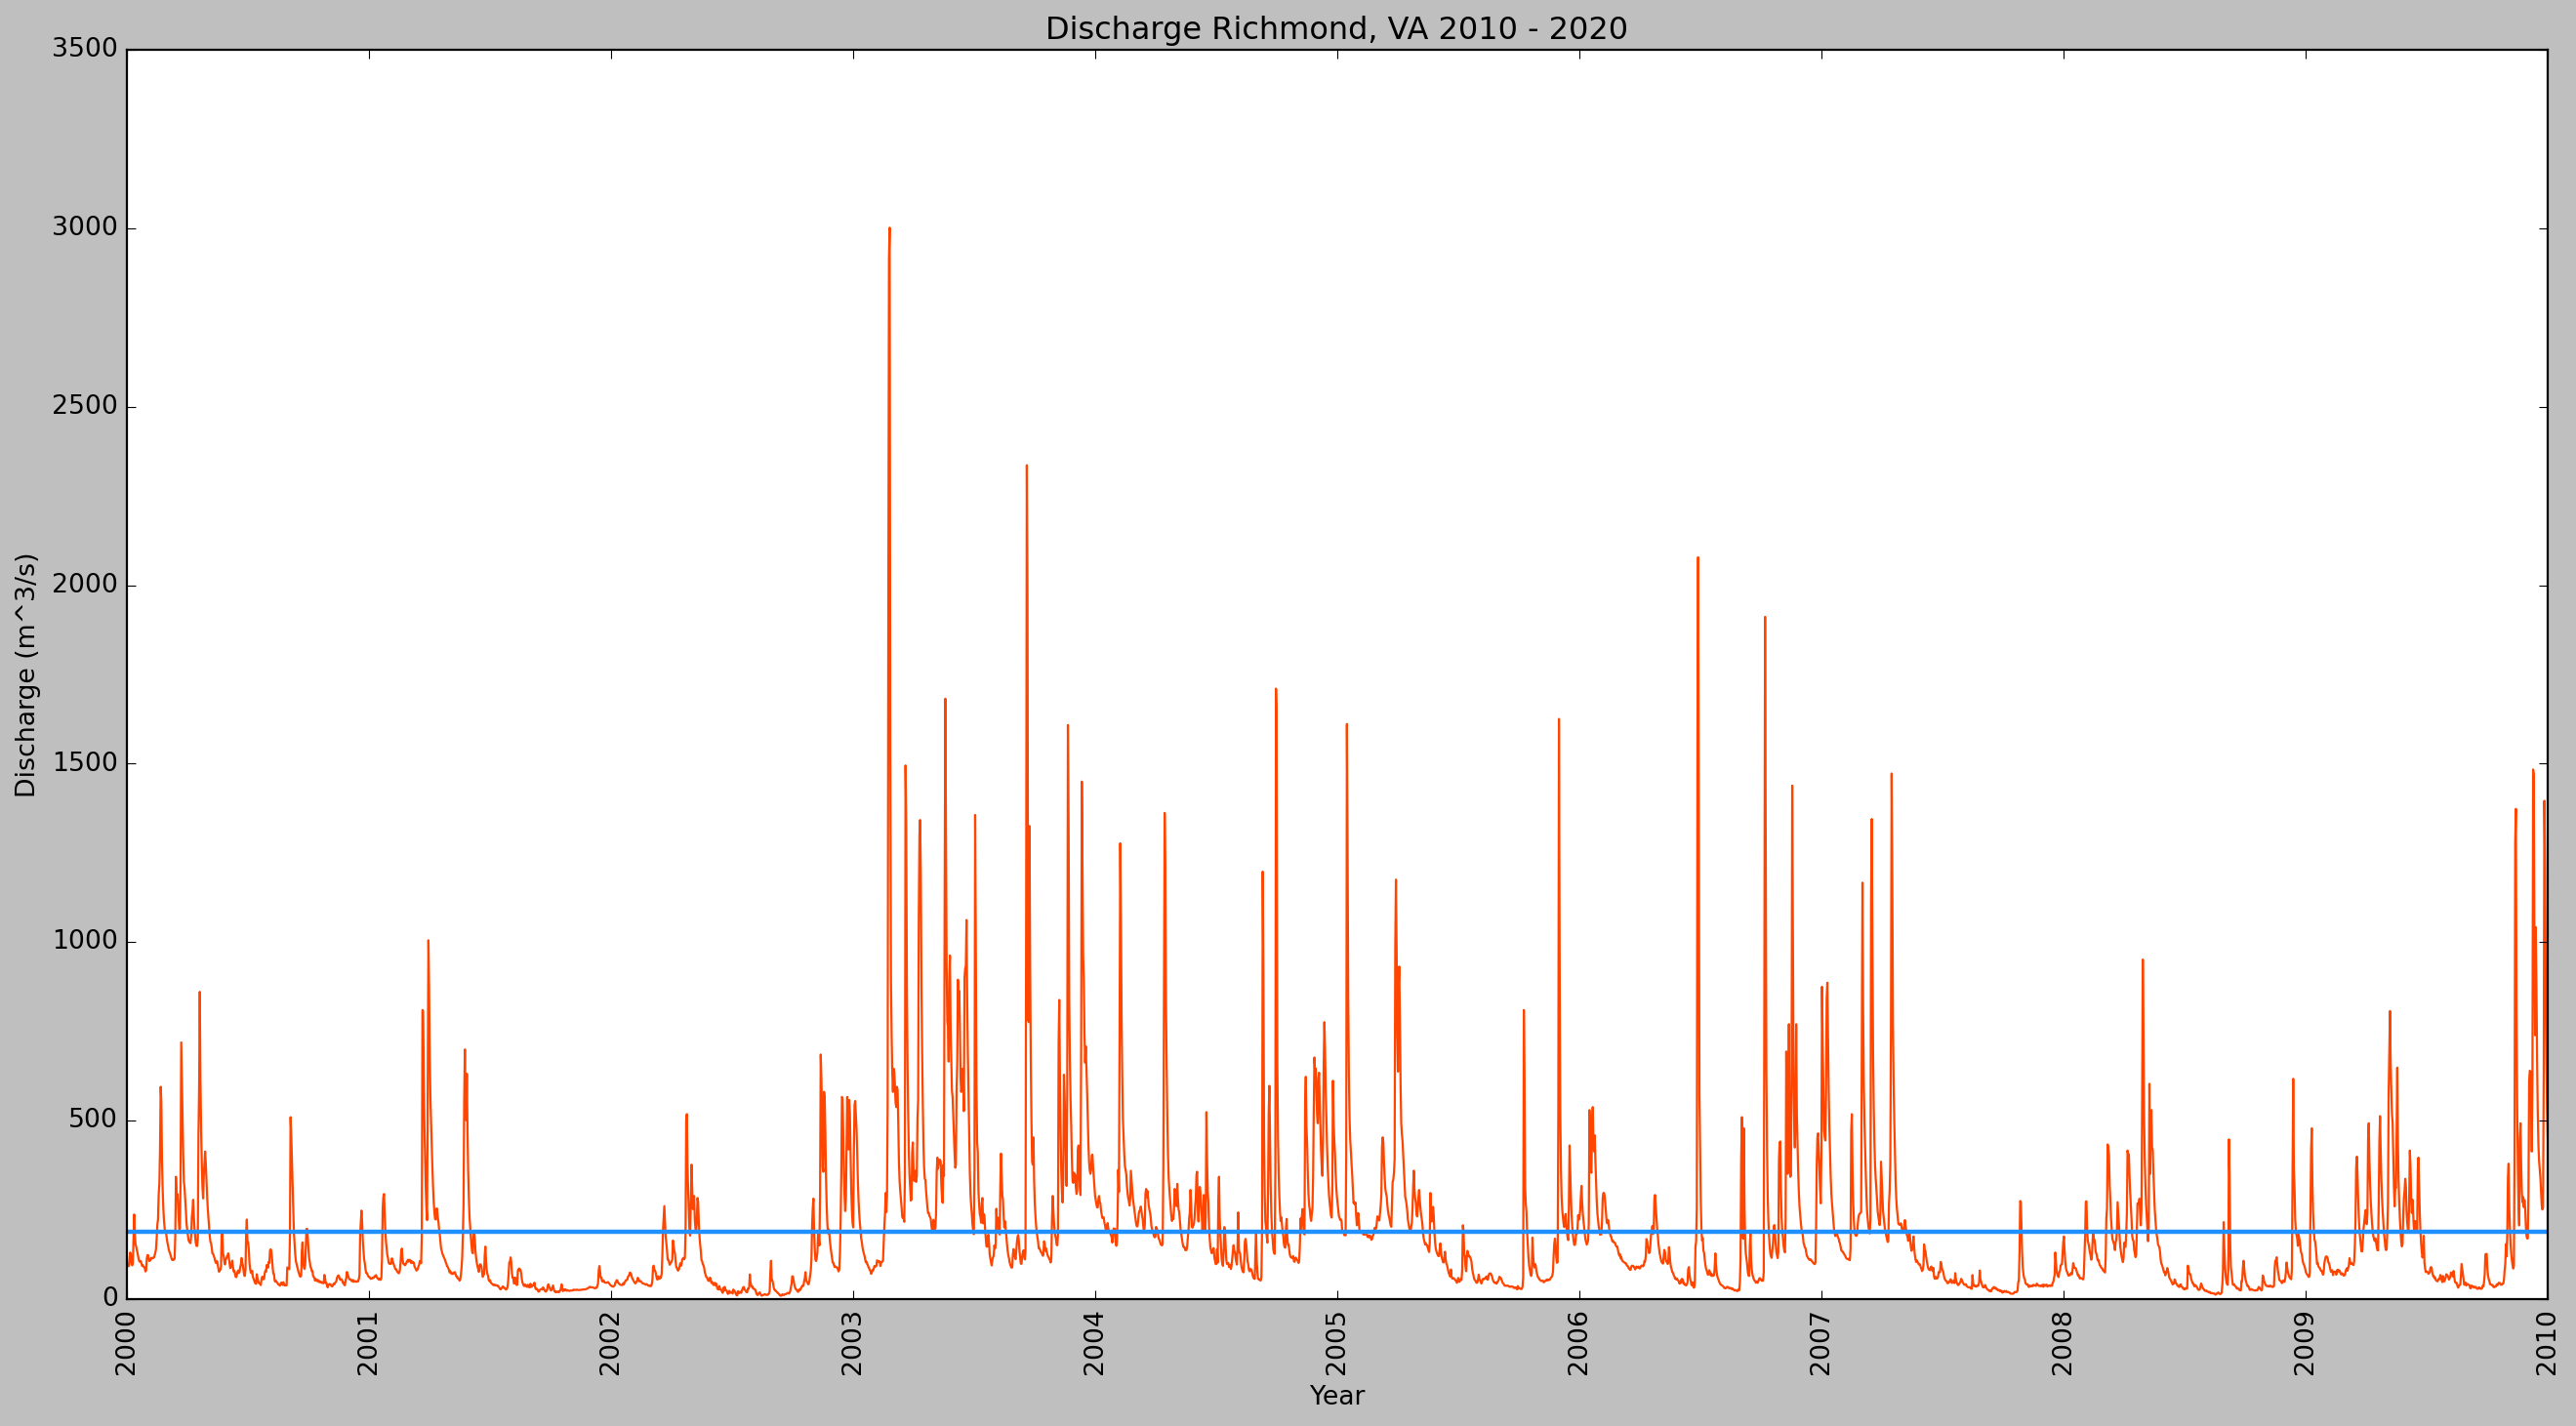

In [90]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from climata.usgs import DailyValueIO
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
import numpy as np

register_matplotlib_converters()
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (20.0, 10.0)
# set parameters
#nyears = 1
#ndays = 365 * nyears
station_id = "02037500"
param_id = "00060"

datelist = pd.date_range(end=datetime.today(), periods=ndays).tolist()
#take an annual average for the river
annual_data = DailyValueIO(
    start_date="2000-01-01",
    end_date="2010-01-01",
    station=station_id,
    parameter=param_id,)
for series in annual_data:
    flow = [r[1] for r in series.data]
    si_flow_annual = np.asarray(flow) * 0.0283168
    flow_mean = np.mean(si_flow_annual)

#now for the storm     
dischg = DailyValueIO(
    start_date="2000-01-01",
    end_date="2010-01-01",
    station=station_id,
    parameter=param_id,)
#create lists of date-flow values
for series in dischg:
    flow = [r[1] for r in series.data]
    si_flow = np.asarray(flow) * 0.0283168
    dates = [r[0] for r in series.data]
plt.plot(dates, si_flow, color= 'orangered')
plt.axhline(y=flow_mean, color='dodgerblue', linestyle='-',linewidth=2.0)
plt.xlabel('Year')
plt.ylabel('Discharge (m^3/s)')
plt.title("Discharge Richmond, VA 2010 - 2020")
plt.xticks(rotation='vertical')
plt.show()

In [91]:
flow_mean

188.7133148400657

In [92]:
df = pd.DataFrame(si_flow)
df.describe()

,0
count,3654.000000
mean,188.713315
std,233.129650
min,9.287910
25%,53.235584
50%,111.568192
75%,230.215584
max,3001.580800


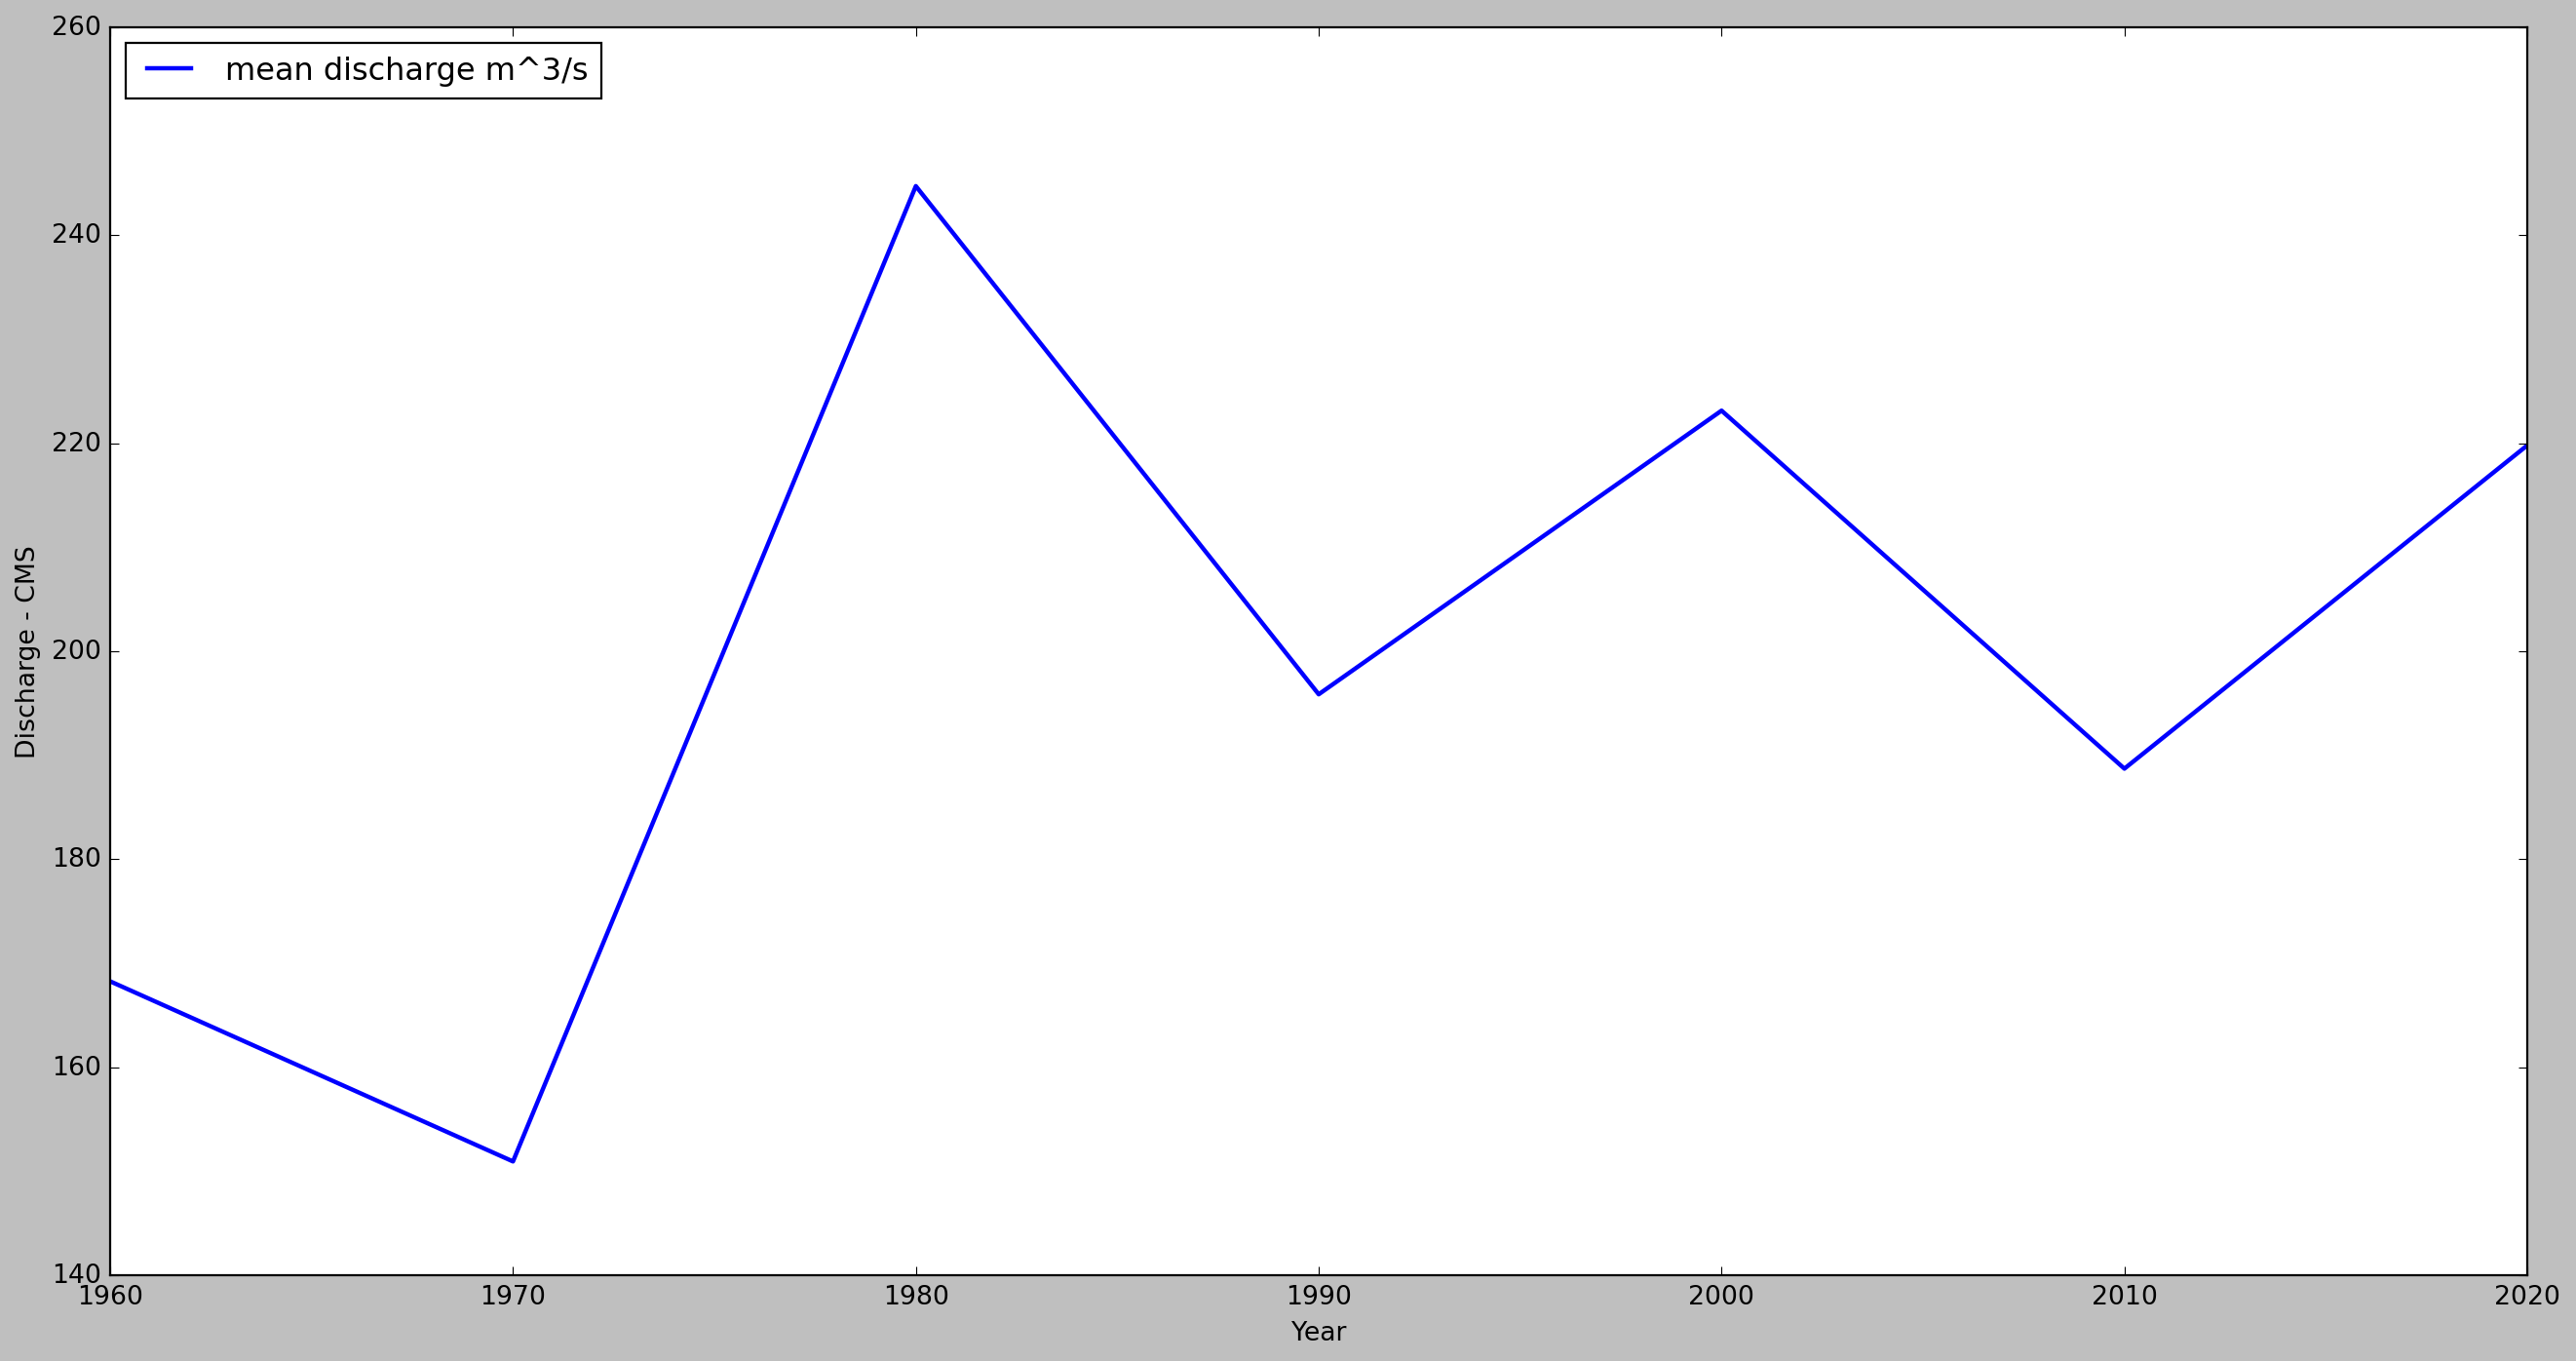

In [101]:
#plotting some additional tables
#PLOTTING STATISTICS
dischmean = [168.26,150.94,244.73,195.86,223.14,188.71,219.80]
dischstdevtop = [72.14,109.12,152.32,158.70,199.39,262.82,276.85]
dischmin = [1.302573,0.283168,0.283168,5.578410,9.769296,9.287910,15.149488]
dischmax = [2446.57152,5521.776000,8381.77280,5833.26080,4020.9856,3001.58080,2859.99680]
reach = [0,44991,99627,165152,227690,278374,341628]
year = ["1960","1970","1980","1990","2000","2010","2020"]
import matplotlib.pyplot as plt
#plt.plot(reach, dischmean, linewidth=2.0,label="mean discharge")
#plt.plot(reach,dischstdev, linewidth=2.0,label="standard deviation discharge")
#plt.plot(reach,dischmin, linewidth=2.0,label="minimum discharge")
plt.plot(year,dischmean, linewidth=2.0,label="mean discharge m^3/s")
plt.legend( loc='upper left')
plt.ylabel('Discharge - CMS')
plt.xlabel('Year')
plt.show()

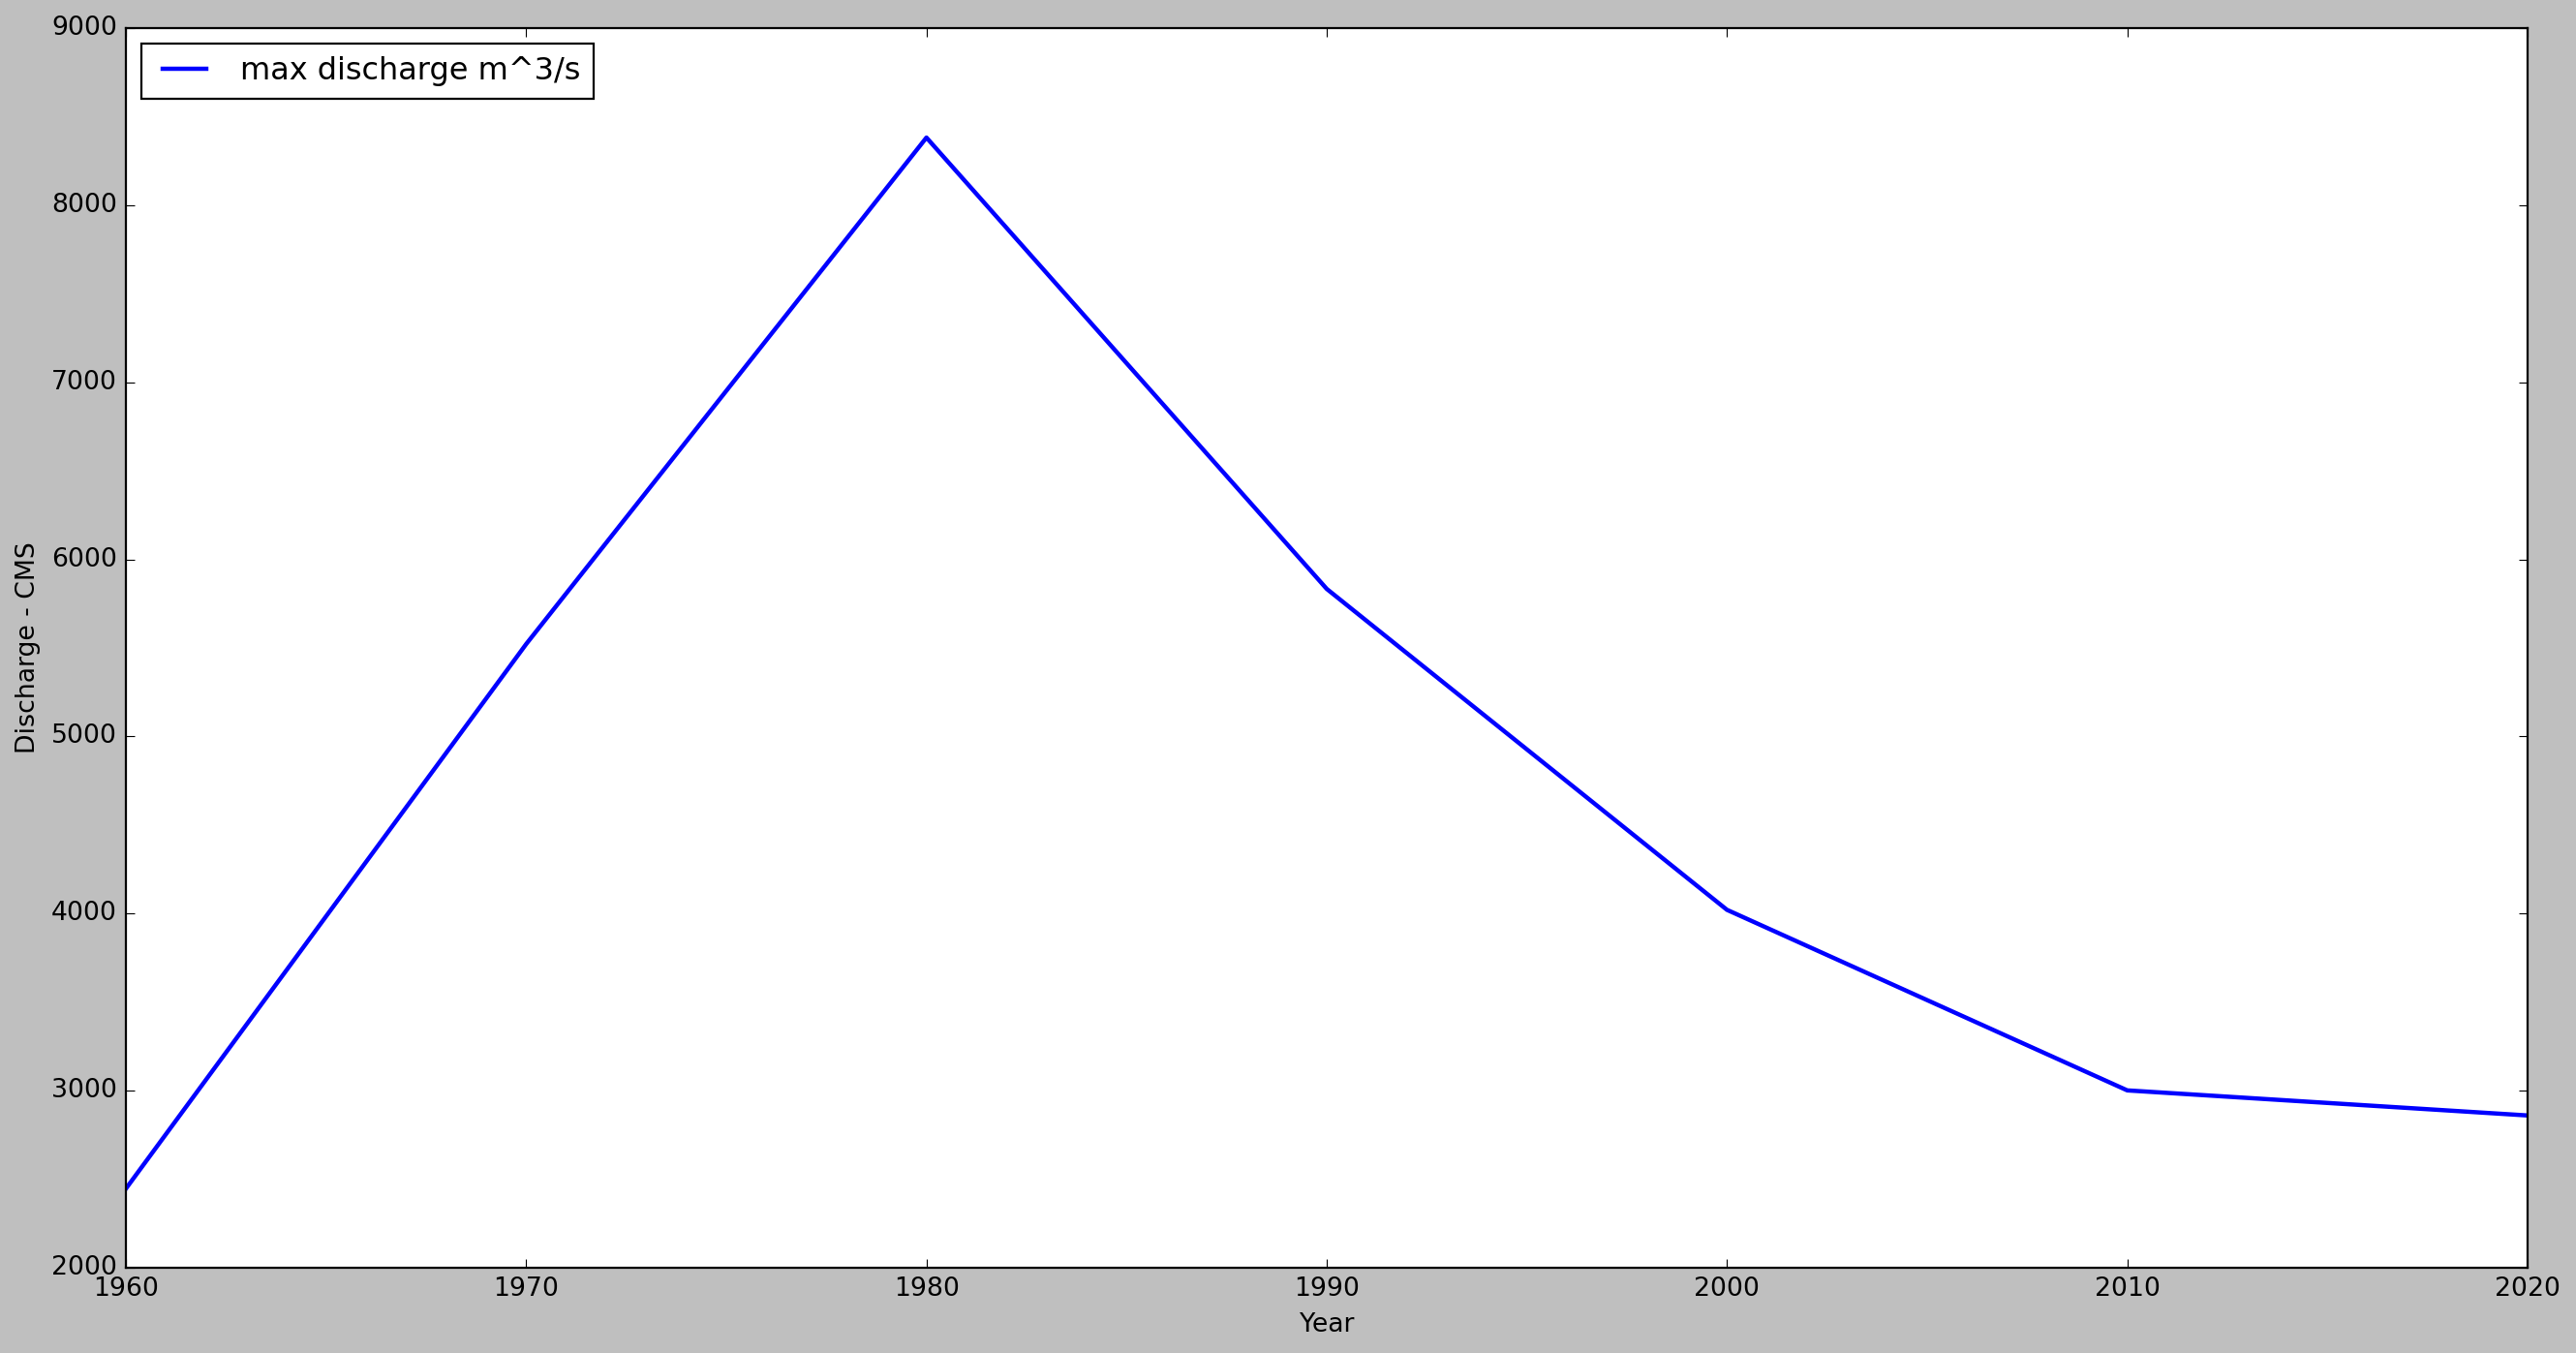

In [100]:
plt.plot(year,dischmax, linewidth=2.0,label="max discharge m^3/s")
plt.legend( loc='upper left')
plt.ylabel('Discharge - CMS')
plt.xlabel('Year')
plt.show()

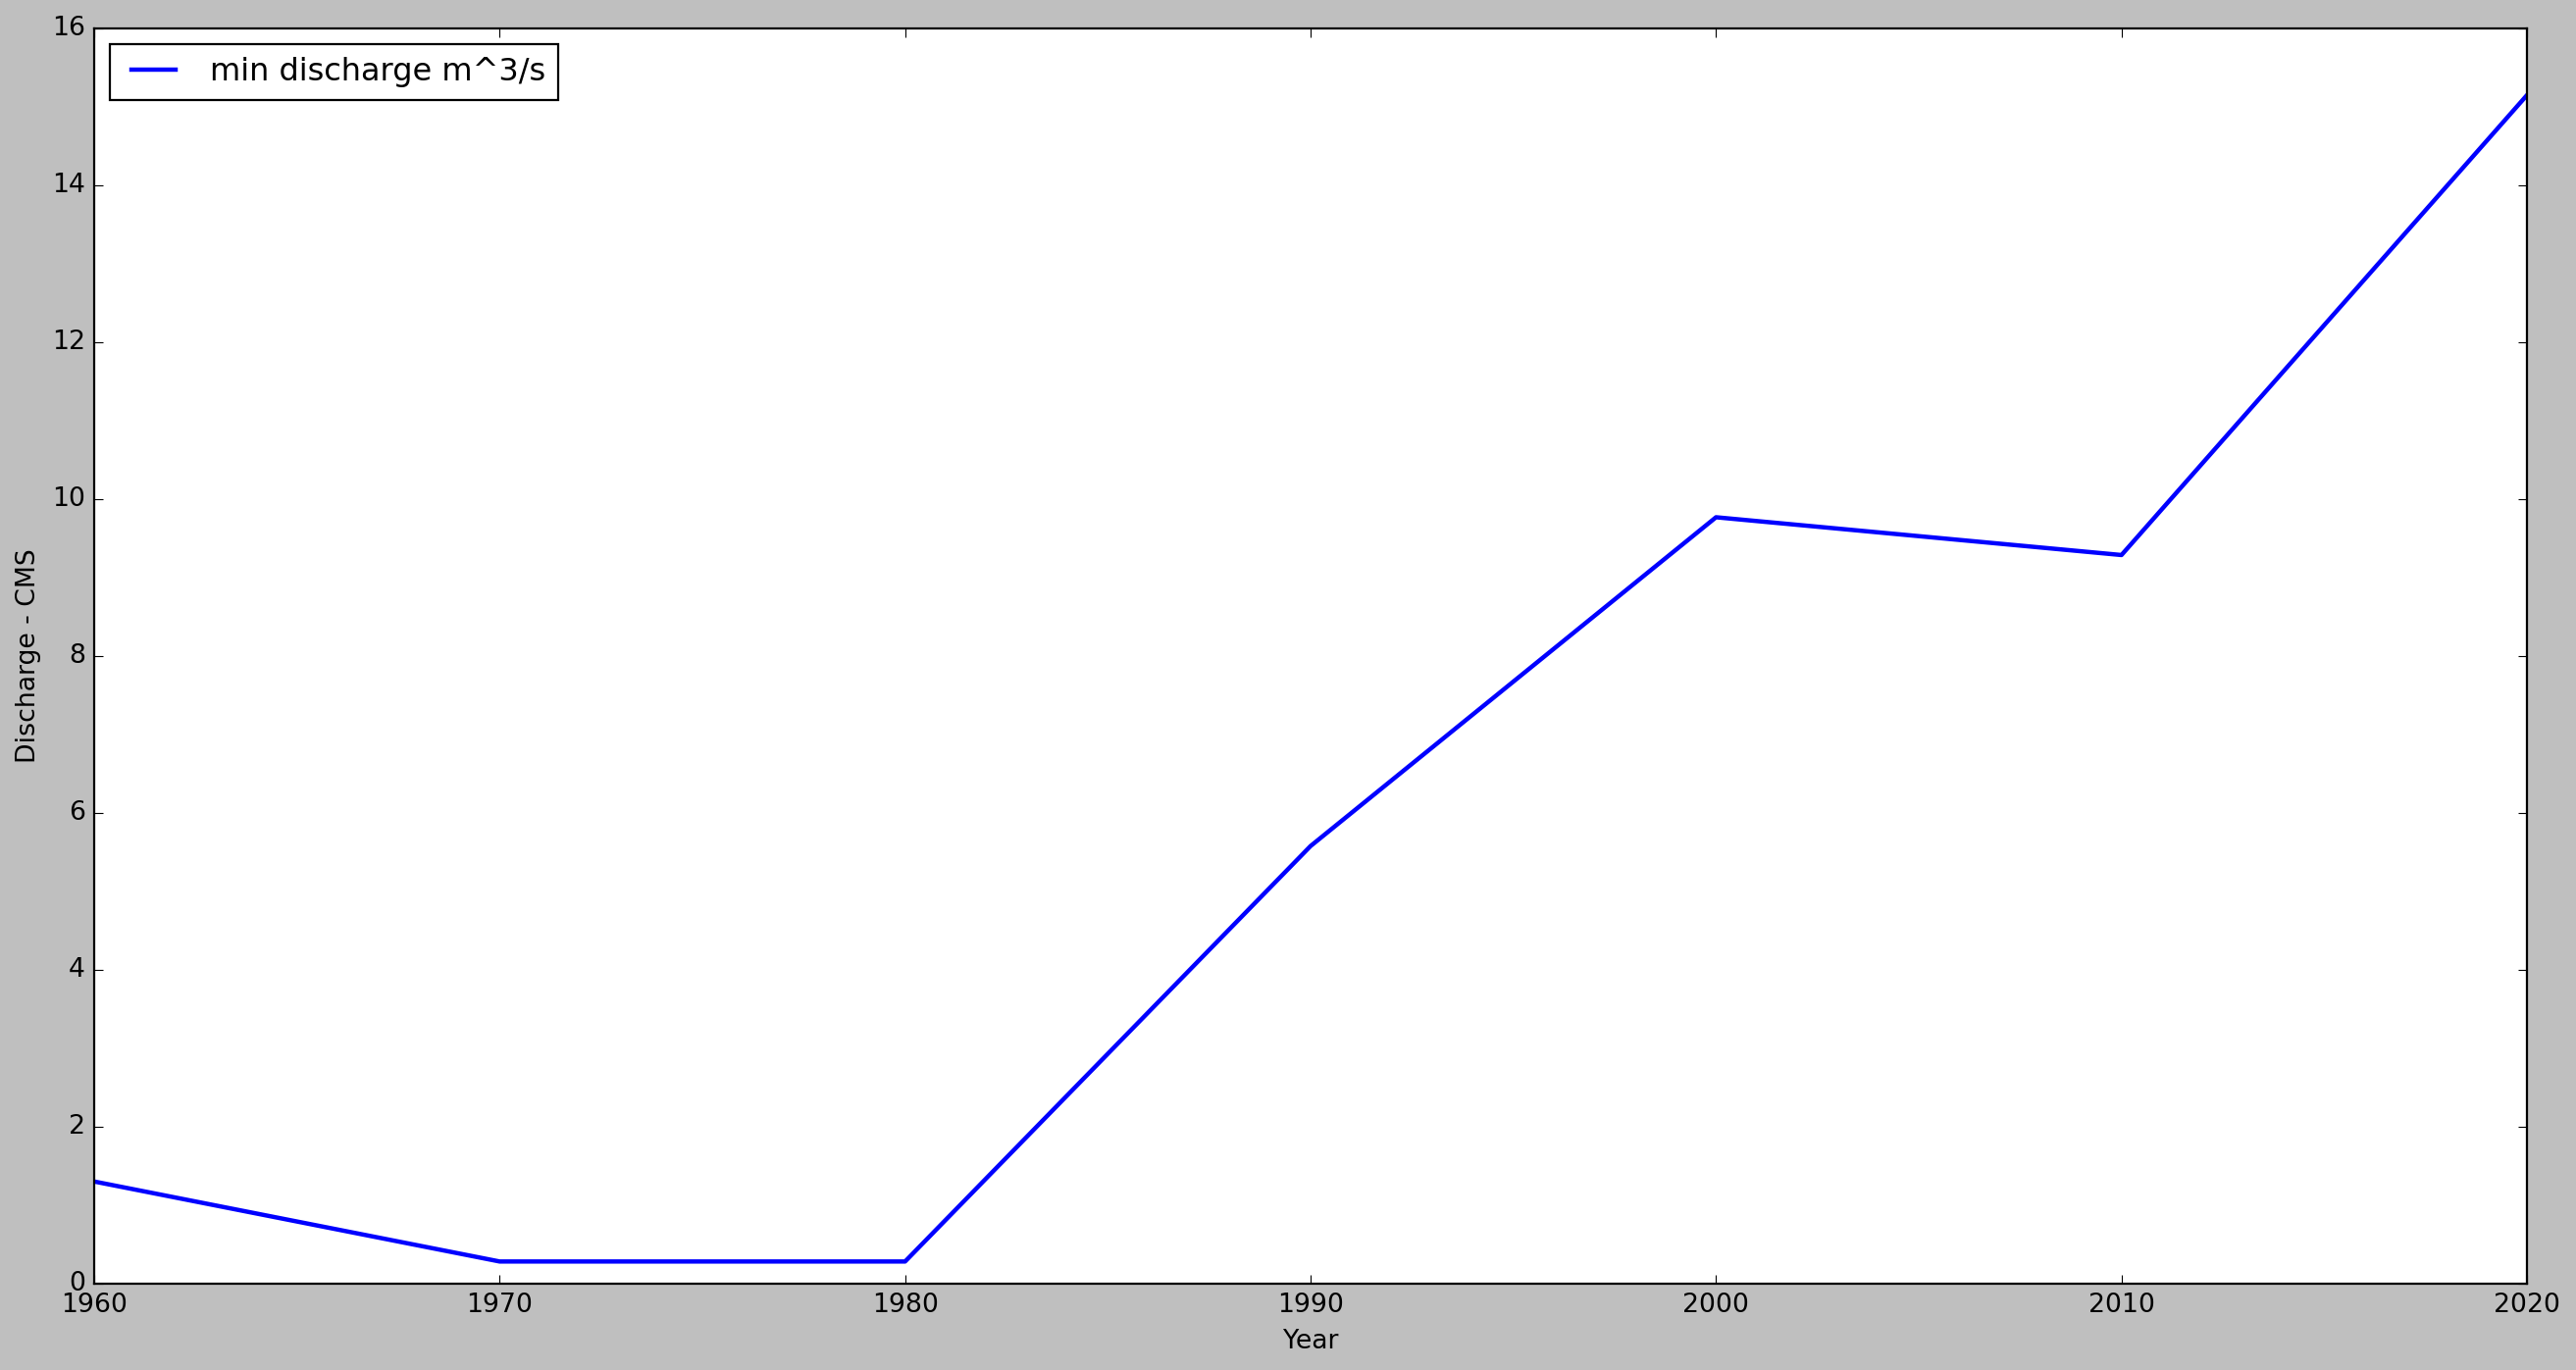

In [102]:
plt.plot(year,dischmin, linewidth=2.0,label="min discharge m^3/s")
plt.legend( loc='upper left')
plt.ylabel('Discharge - CMS')
plt.xlabel('Year')
plt.show()